# Libraries in Poland

## Overview

The notebook works with datasets containing information about libraries in Poland and statistics data about population by province/voivodeship.

Libraries are a very important institution in Poland. They are not only the place established for borrowing books, but they are the public-oriented culture-promoting centres.

Some of the libraries have the quite innovative environment and well designed. Their cosy spaces are divided into zones, including the shelves with the books, the reading rooms, librarian’s desks, the children’s corners, the media libraries, the computer work stations, the conference halls, the photographic and artistic studios, the galleries and the cafés.

Every library has some key performance indicators (KPI) that help evaluate the effectiveness of its strategy and tactics.
We don't have any information about Poland's libraries KPI, but we can use the open data to try to analyze libraries' success.

1. The libraries have the need to involve the community in the library’s activity. 
* Let's check the numbers of libraries per 1000 people.
* Do people with disabilities have an access to the libraries?

2. Library collection is a foundational to being able to build successful services and communities. Classical metrics for the libraries is the collection size and the number of materials circulated. 
Let's check
* how many loans the libraries have?
* how many books per reader the libraries have?

3. I this data set we don't have such metrics as user satisfaction, user participation, user support, user development,  the staff satisfaction, but we have such metrics as
* the number of trained staff and we can calculate - Number of librarians per 100 readers.

## Goals
For each province/voivodeship we are going to calculate and visualize some mentrics and indicators.

1. Comparison of involving the community in the library’s activity
2. Availability of libraries for people with disabilities
3. Comparison of the number of trained staff per 100 readers
4. Calculating the сlassical metrics for the libraries:
* the collection size - how many books per reader the libraries have?
* the number of materials circulated - how many loans the libraries have?
5. To determine _three most successful provinces_. The indicators we take into consideration:
* Amount of libraries per 1000 people
* Amount of books per 100 readers
* The number of trained staff per 100 readers
* The number of libraries with facilities for people with disabilities

We're going to get top three provinces/voivodeships - which are the most effective in attracting the inhabitants and the readers to reading.

In [1]:
# General Libraries
import os
import math
import pandas as pd
import numpy as np
from pathlib import Path

# For the Visuals
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline

# Custom colors
class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m'

# For plotting on the map of Poland
# from cartopy import crs as ccrs
# import geopandas
# https://www.youtube.com/watch?v=Q0z1cPD_7yE
# https://nbviewer.org/github/ehmatthes/intro_programming/blob/master/notebooks/visualization_earthquakes.ipynb
# https://dges.carleton.ca/CUOSGwiki/index.php/Creating_Maps_in_Jupyter_Notebook_using_GeoPandas_and_CartoPy

# 1. Dataset
There are two files - .csv and .xlsx files:
* Libraries in Poland.csv - describes situation of libraries in Poland in 2021. The numbers are ordered by Voivodeship and the columns contain information about number of workers, books, loans and some more. Source - [Government data on libraries in Poland](https://www.kaggle.com/datasets/julianowakowska/libraries-in-poland)
* Population Poland.xlsx - Government data on Population in Poland. The data comes from the website of polish statistical office: stat.gov.pl


In [2]:
# Read datasets we work with

# Read Libraries in Poland dataset
libraries = pd.read_csv('Libraries in Poland.csv', engine='python', sep=';')

# Read Population in Poland dataset
population = pd.read_excel('Population Poland.xlsx')


# Preprocessing

## Preprocessing - Libraries in Poland dataset

In [4]:
libraries.head()

,Voivodeship,Number_of_libraries,Number_of_librarians,Amount_of_books,Number_of_readers,Number_of_loans,Facility_adapted_to_the_needs_of_people_with_disabilities,Facility_adapted_to_the_needs_of_people_with_disabilities_(entrance),Facility_adapted_to_the_needs_of_people_with_disabilities_(inside_the_building)
0,dolnoslaskie,577,1285,8336572,334400,5835250,284,280,190
1,kujawsko-pomorskie,389,896,6914854,199304,4090235,199,194,112
2,lubelskie,563,1246,6432174,286248,5336857,274,270,174
3,lubuskie,241,513,3897814,103819,1969505,94,93,60
4,lodzkie,467,1170,7794999,315051,6322797,201,195,131


## Data backgroud

* Voivodeship - provinces' names
* Number of libraries - number of libraries
* Number of librarians - sum of workers of all libraries in voivodeship
* Amount of books - number of books in all libraries in voivodeship
* Number of readers - number of people signed up to the library
* Number of loans - number of loans in all libraries in the voivodeship in 2021
* Facility adapted to the needs of people with disabilities - in general
* Facility adapted to the needs of people with disabilities (entrance) - adaptations at the entrance
* Facility adapted to the needs of people with disabilities (inside the building) - adaptations inside the buildings

In [3]:
# Data set Libraries - Rename columns

libraries.columns = libraries.columns.str.replace(' ', '_')

In [4]:
libraries.columns

Index(['Voivodeship', 'Number_of_libraries', 'Number_of_librarians',
       'Amount_of_books', 'Number_of_readers', 'Number_of_loans',
       'Facility_adapted_to_the_needs_of_people_with_disabilities',
       'Facility_adapted_to_the_needs_of_people_with_disabilities_(entrance)',
       'Facility_adapted_to_the_needs_of_people_with_disabilities_(inside_the_building)'],
      dtype='object')

In [4]:
# Data set Libraries - Renaming the columns having too long titles
libraries = libraries\
.rename(columns=
        {'Facility_adapted_to_the_needs_of_people_with_disabilities':'Facility_total',
        'Facility_adapted_to_the_needs_of_people_with_disabilities_(entrance)':'Facility_entrance',
        'Facility_adapted_to_the_needs_of_people_with_disabilities_(inside_the_building)':'Facility_inside'}
       )

In [5]:
#The total number of rows and columns in the data set Libraries
libraries.shape

(16, 9)

In [6]:
libraries.dtypes

Voivodeship             object
Number_of_libraries      int64
Number_of_librarians     int64
Amount_of_books          int64
Number_of_readers        int64
Number_of_loans          int64
Facility_total           int64
Facility_entrance        int64
Facility_inside          int64
dtype: object

In [7]:
print(clr.S+"There are no missing values in any columns:"+clr.E,
      libraries.isna().sum()[-1], "total missing values")

There are no missing values in any columns: 0 total missing values


In [8]:
libraries.describe()

,Number_of_libraries,Number_of_librarians,Amount_of_books,Number_of_readers,Number_of_loans,Facility_total,Facility_entrance,Facility_inside
count,16.00000,16.00000,1.600000e+01,16.000000,1.600000e+01,16.000000,16.000000,16.000000
mean,480.81250,1149.00000,7.792294e+06,300432.625000,5.569667e+06,216.375000,212.750000,133.062500
std,217.87832,598.95164,4.173377e+06,193705.820189,3.412643e+06,105.604214,104.357399,64.379571
min,226.00000,513.00000,3.632525e+06,103819.000000,1.969505e+06,91.000000,90.000000,54.000000
25%,298.75000,668.25000,4.616134e+06,142080.000000,2.877382e+06,123.750000,122.250000,79.000000
50%,428.00000,1044.50000,6.673514e+06,277435.500000,4.908469e+06,200.000000,194.500000,118.000000
75%,655.25000,1359.00000,9.097896e+06,353553.750000,6.875729e+06,282.500000,277.000000,179.500000
max,941.00000,2648.00000,1.756797e+07,766241.000000,1.283670e+07,465.000000,461.000000,269.000000


In [9]:
print(clr.S+f"Number of records in the dataset Libraries is : {libraries.shape[0]}"+clr.E)
print(clr.S+f"\033[1mNumber of unique Voivodeships in the dataset Libraries is: {libraries.Voivodeship.nunique()}"+clr.E)

#print(f"\033[1mNumber of records in the dataset is : {libraries.shape[0]}")
#print(f"\033[1mNumber of unique Voivodeships : {libraries.Voivodeship.nunique()}")

Number of records in the dataset Libraries is : 16
Number of unique Voivodeships in the dataset Libraries is: 16


In [10]:
#Are there any duplicated data?
libraries.loc[libraries.duplicated()]

,Voivodeship,Number_of_libraries,Number_of_librarians,Amount_of_books,Number_of_readers,Number_of_loans,Facility_total,Facility_entrance,Facility_inside


**There are not any duplicated data in the dataset Libraries**

## Preprocessing - Population in Poland dataset

In [11]:
population.head()

,Voivodships,Total,Males,Females,UrbanTotal,Urban Males,Urban females,Rural total,Rural males,Rural females
0,Dolnośląskie,2884011.0,1385466.0,1498545.0,1966760.0,928290.0,1038470.0,917251.0,457176.0,460075.0
1,Kujawsko-pomorskie,2054163.0,994997.0,1059166.0,1201132.0,567623.0,633509.0,853031.0,427374.0,425657.0
2,Lubelskie,2086403.0,1010760.0,1075643.0,969489.0,456230.0,513259.0,1116914.0,554530.0,562384.0
3,Lubuskie,1003150.0,487618.0,515532.0,648523.0,309973.0,338550.0,354627.0,177645.0,176982.0
4,Łódzkie,2426806.0,1156002.0,1270804.0,1508597.0,700948.0,807649.0,918209.0,455054.0,463155.0


In [12]:
#We are not going to analize male or female, urban and rural population separately,
# because we don't have such data in Libraries data set that's why let's drop the columns we don't need

population=population[['Voivodships', 'Total'
#                        , 'Males', 'Females'
#             , 'UrbanTotal', 'Urban Males',
#        'Urban females', 'Rural total', 'Rural males', 'Rural females'
           ]].copy()

In [13]:
population.head()

,Voivodships,Total
0,Dolnośląskie,2884011.0
1,Kujawsko-pomorskie,2054163.0
2,Lubelskie,2086403.0
3,Lubuskie,1003150.0
4,Łódzkie,2426806.0


In [14]:
##The total number of rows and columns in the data set Population
population.shape

(17, 2)

In [15]:
population.dtypes

Voivodships     object
Total          float64
dtype: object

In [16]:
population.describe()

,Total
count,1.700000e+01
mean,4.489673e+06
std,8.765186e+06
min,9.732980e+05
25%,1.410643e+06
50%,2.115578e+06
75%,3.408505e+06
max,3.816222e+07


In [17]:
# converting data type to integer

# TASK - как это сделать без указания всех названий столбцов, а перебрать индекс от 1 до конца

population = population.astype({"Total":"int"})

population.dtypes

Voivodships    object
Total           int32
dtype: object

In [18]:
print(clr.S+"There are no missing values in any columns:"+clr.E,
      population.isna().sum()[-1], "total missing values")

There are no missing values in any columns: 0 total missing values


In [19]:
#Are there any duplicated data?
population.loc[population.duplicated()]

,Voivodships,Total


**There are not any duplicated data in the dataset Population**

In [20]:
print(clr.S+f"Number of records in the dataset Population is : {population.shape[0]}"+clr.E)
print(clr.S+f"\033[1mNumber of unique Voivodeships in the dadaset Population: {population.Voivodships.nunique()}"+clr.E)

Number of records in the dataset Population is : 17
Number of unique Voivodeships in the dadaset Population: 17


In [21]:
print(clr.S+f"Number of rows in the dataset Libraries is : {len(libraries)}"+clr.E)
print(clr.S+f"Number of rows in the dataset Population is : {len(population)}"+clr.E)

Number of rows in the dataset Libraries is : 16
Number of rows in the dataset Population is : 17


Let's pay attention to mismatchings:


1. The names of columns in two our datasets.
Look at the dataset Population. The column with the names of Poland provinces' called Voivodships, whereas the name of the same column in the dataset Libraries' named Voivodeships.
*We have to rename a column in the data set Population.

2. The quantity of the rows.
Actually there are 16 provinces in Poland. In the Libraries dataset there are 16 rows according the names of the provinces. Whereas there are 17 rows in data set Population.
*What does it cause such mismatching? 

In [22]:
#Rename column Voivodships to Voivodeships
population = population \
        .rename(columns = {'Voivodships':'Voivodeships'})

In [24]:
#What data do we have in column Voivodeships in data set Population?
list(population.Voivodeships)

['Dolnośląskie',
 'Kujawsko-pomorskie',
 'Lubelskie',
 'Lubuskie',
 'Łódzkie',
 'Małopolskie',
 'Mazowieckie',
 'Opolskie',
 'Podkarpackie',
 'Podlaskie',
 'Pomorskie',
 'Śląskie',
 'Świętokrzyskie',
 'Warmińsko-mazurskie',
 'Wielkopolskie',
 'Zachodniopomorskie',
 'Poland']

In [23]:
print(
    clr.S+"We can see that in the dataset Population there is the 17th row that summirizes the data called"+clr.E,
        population.iloc[-1,0])


We can see that in the dataset Population there is the 17th row that summirizes the data called Poland


In [24]:
#dropping the 17th row from data set Population

population = population.drop([16], axis=0)
population

,Voivodeships,Total
0,Dolnośląskie,2884011
1,Kujawsko-pomorskie,2054163
2,Lubelskie,2086403
3,Lubuskie,1003150
4,Łódzkie,2426806
5,Małopolskie,3408505
6,Mazowieckie,5419963
7,Opolskie,973298
8,Podkarpackie,2115578
9,Podlaskie,1169434


## Resume

We have got two data sets for 16 provinces/voivodeships in Poland with consistent data

# Exploring

# Libraries per Voivodeship

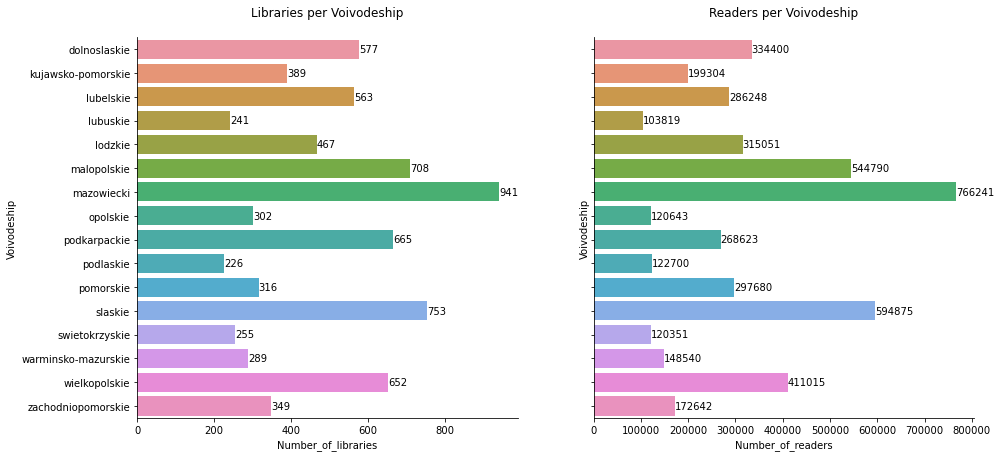

In [26]:
#Libraries per Voivodeship and Readers per Voivodeship

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 7))

plt.subplot(1, 2, 1)
ax = sns.barplot(data = libraries, x = 'Number_of_libraries', y = 'Voivodeship')
plt.title('Libraries per Voivodeship\n')
for i in ax.containers:
    ax.bar_label(i,)
plt.subplot(1, 2, 2)
ax = sns.barplot(data = libraries, x = 'Number_of_readers', y = 'Voivodeship')
plt.title('Readers per Voivodeship\n')
for i in ax.containers:
    ax.bar_label(i,)
    
sns.despine(top=True)

In [28]:
print(
clr.S+"Top five voivodeships in terms of the Number of Libraries:"+clr.E,
libraries.sort_values('Number_of_libraries', ascending = False).Voivodeship[:5].str.cat(sep = ', '))

print(
clr.S+"Top five voivodeships in terms of the Number of Readers:"+clr.E,
libraries.sort_values('Number_of_readers', ascending = False).Voivodeship[:5].str.cat(sep = ', '))


Top five voivodeships in terms of the Number of Libraries: mazowiecki, slaskie, malopolskie, podkarpackie, wielkopolskie
Top five voivodeships in terms of the Number of Readers: mazowiecki, slaskie, malopolskie, wielkopolskie, dolnoslaskie


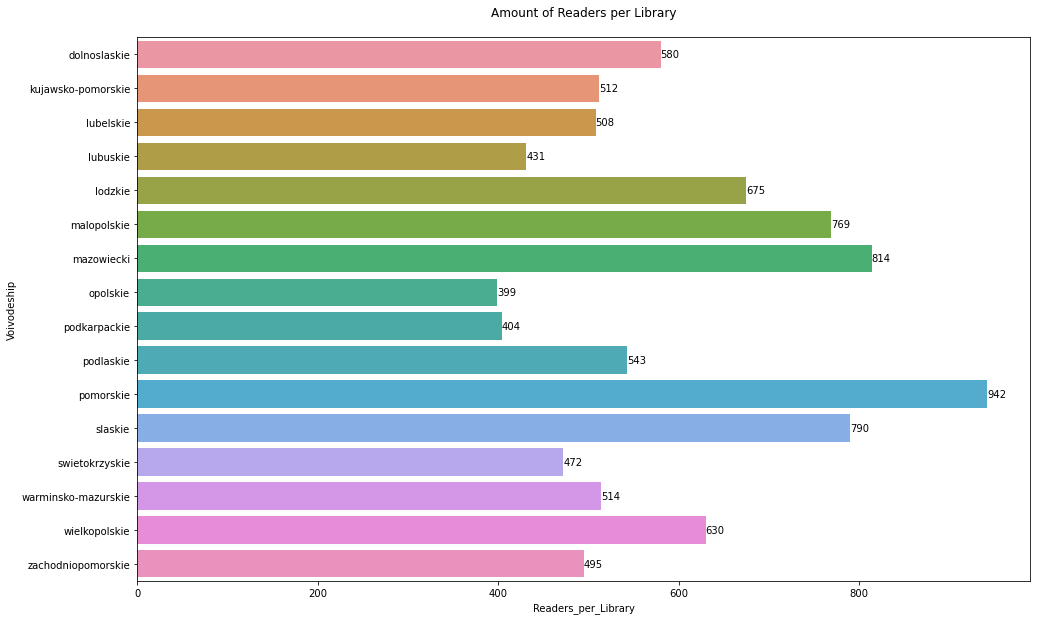

In [29]:
#Readers_per_Library
libraries['Readers_per_Library'] = (libraries['Number_of_readers'] / libraries['Number_of_libraries']).round(0)

plt.figure(figsize=(16,10))
ax = sns.barplot(data = libraries, x = 'Readers_per_Library', y = 'Voivodeship')
plt.title('Amount of Readers per Library\n')
for i in ax.containers:
    ax.bar_label(i,)

In [30]:
print(
clr.S+"Top five voivodeships in terms of Amount of Readers per Library:"+clr.E,
libraries.sort_values('Readers_per_Library', ascending = False).Voivodeship[:5].str.cat(sep = ', '))

The first five voivodeships in terms of Amount of Readers per Library: pomorskie, mazowiecki, slaskie, malopolskie, lodzkie


## Let's build several interactive barcharts

In [32]:
# Interactive bar chart with Plotly Express
# Libraries per 10000 inhabitants

fig1 = px \
        .bar(x = (libraries.Number_of_libraries*10000 / population.Total).round(2), 
             y = libraries.Voivodeship, 
             color=libraries.Voivodeship,
            )

fig1.update_layout(
    title='Libraries per 10000 inhabitants (Interactive bar chart)',
    xaxis_title='Libraries 10000 inhabitants',
    yaxis_title='Voivodeship',
    font=dict(
    family="Courier New, monospace",
    size=14,
    color="RebeccaPurple"
    )
)

fig1.show()

In [33]:
libraries['Libraries_per_10000'] = (libraries['Number_of_libraries']*10000 / population['Total']).round(0)

In [34]:
print(
clr.S+"Top five voivodeships in terms of Amount of Libraries per 10000 inhabitants:"+clr.E,
libraries.sort_values('Libraries_per_10000', ascending = False).Voivodeship[:5].str.cat(sep = ', '))

The first five voivodeships in terms of Amount of Libraries per 10000 inhabitants: lubelskie, opolskie, podkarpackie, dolnoslaskie, kujawsko-pomorskie


In [35]:
# Interactive bar chart with Plotly Express
# Libraries per 1000 readers

fig2 = px \
        .bar(x = (libraries.Number_of_libraries*1000 / libraries.Number_of_readers).round(2), 
             y = libraries.Voivodeship, 
             color=libraries.Voivodeship,
            )

fig2.update_layout(
    title='Libraries per 1000 Readers (Interactive bar chart)',
    xaxis_title='Libraries per 1000 Readers',
    yaxis_title='Voivodeship',
    font=dict(
    family="Courier New, monospace",
    size=14,
    color="RebeccaPurple"
    )
)

fig2.show()

In [36]:
libraries['Libraries_per_Readers'] = (libraries['Number_of_libraries']*1000 / libraries['Number_of_readers']).round(0)

In [37]:
print(
clr.S+"Top five voivodeships in terms of Amount of Libraries per 1000 Readers:"+clr.E,
libraries.sort_values('Libraries_per_Readers', ascending = False).Voivodeship[:5].str.cat(sep = ', '))

The first five voivodeships in terms of Amount of Libraries per 1000 Readers: opolskie, dolnoslaskie, kujawsko-pomorskie, lubelskie, lubuskie


In [38]:
# Interactive bar chart with Plotly Express
# Readers per 10000 inhabitatnts

fig3 = px \
        .bar(x = (libraries.Number_of_readers*10000 / population.Total).round(2), 
             y = libraries.Voivodeship, 
             color=libraries.Voivodeship,
            )

fig3.update_layout(
    title='Readers per 10000 inhabitatnts (Interactive bar chart)',
    xaxis_title='Readers per 10000 inhabitatnts',
    yaxis_title='Voivodeship',
    font=dict(
    family="Courier New, monospace",
    size=14,
    color="RebeccaPurple"
    )
)

fig3.show()

In [39]:
libraries['Readers_per_10000'] = (libraries['Number_of_readers']*10000 / population['Total']).round(0)

In [40]:
print(
clr.S+"Top five voivodeships in terms of Amount of Readers per 10000 inhabitatnts:"+clr.E,
libraries.sort_values('Readers_per_10000', ascending = False).Voivodeship[:5].str.cat(sep = ', '))

The first five voivodeships in terms of Amount of Readers per 10000 inhabitatnts: malopolskie, mazowiecki, lubelskie, slaskie, lodzkie


In [41]:
# Interactive bar chart with Plotly Express
# Number of Staff per 1000 readers

fig2 = px \
        .bar(x = (libraries.Number_of_librarians*1000 / libraries.Number_of_readers).round(2), 
             y = libraries.Voivodeship, 
             color=libraries.Voivodeship,
            )

fig2.update_layout(
    title='Number of Librarians per 1000 readers (Interactive bar chart)',
    xaxis_title='Number of Librarians per 1000 readers',
    yaxis_title='Voivodeship',
    font=dict(
    family="Courier New, monospace",
    size=14,
    color="RebeccaPurple"
    )
)

fig2.show()

In [45]:
libraries['Librarians_per_Readers']=(libraries['Number_of_librarians']*1000 / libraries['Number_of_readers'])\
                                    .round(0)

In [46]:
print(
clr.S+"Top five voivodeships in terms of Amount of Readers per 1000 Readers:"+clr.E,
libraries.sort_values('Librarians_per_Readers', ascending = False).Voivodeship[:5].str.cat(sep = ', '))

The first five voivodeships in terms of Amount of Readers per 1000 Readers: lubuskie, opolskie, podlaskie, swietokrzyskie, warminsko-mazurskie


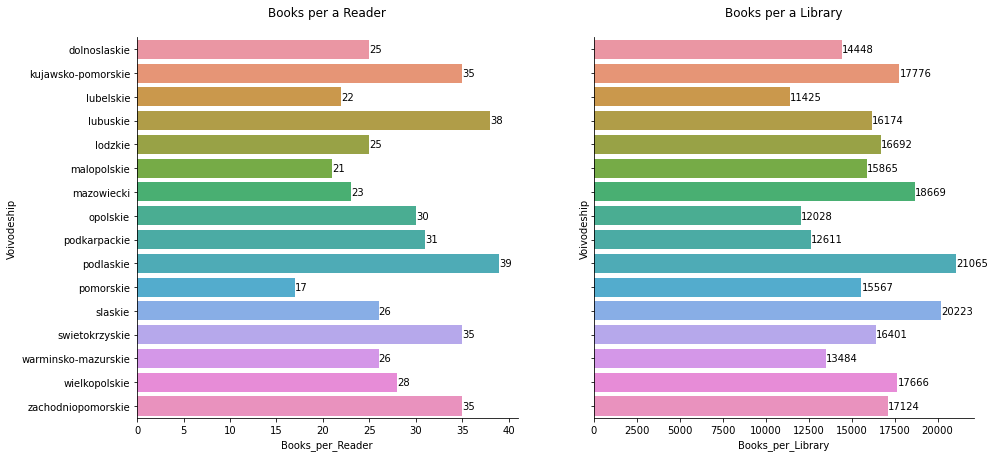

In [47]:
#Amount of Books per a Reader and Amount of Books per Library

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 7))

libraries['Books_per_Reader'] = (libraries['Amount_of_books'] / libraries['Number_of_readers']).round(0)

libraries['Books_per_Library'] = (libraries['Amount_of_books'] / libraries['Number_of_libraries']).round(0)

plt.subplot(1, 2, 1)
ax = sns.barplot(data = libraries, x = 'Books_per_Reader', y = 'Voivodeship')
plt.title('Books per a Reader\n')
for i in ax.containers:
    ax.bar_label(i,)
plt.subplot(1, 2, 2)
ax = sns.barplot(data = libraries, x = 'Books_per_Library', y = 'Voivodeship')
plt.title('Books per a Library\n')
for i in ax.containers:
    ax.bar_label(i,)
       
sns.despine(top=True)


In [48]:
print(
clr.S+"Top five voivodeships in terms of Amount of Books per a Reader:"+clr.E,
libraries.sort_values('Books_per_Reader', ascending = False).Voivodeship[:5].str.cat(sep = ', '))
print(
clr.S+"Top five voivodeships in terms of Amount of Books per a Library:"+clr.E,
libraries.sort_values('Books_per_Library', ascending = False).Voivodeship[:5].str.cat(sep = ', '))

The first five voivodeships in terms of Amount of Books per a Reader: podlaskie, lubuskie, kujawsko-pomorskie, swietokrzyskie, zachodniopomorskie
The first five voivodeships in terms of Amount of Books per a Library: podlaskie, slaskie, mazowiecki, kujawsko-pomorskie, wielkopolskie


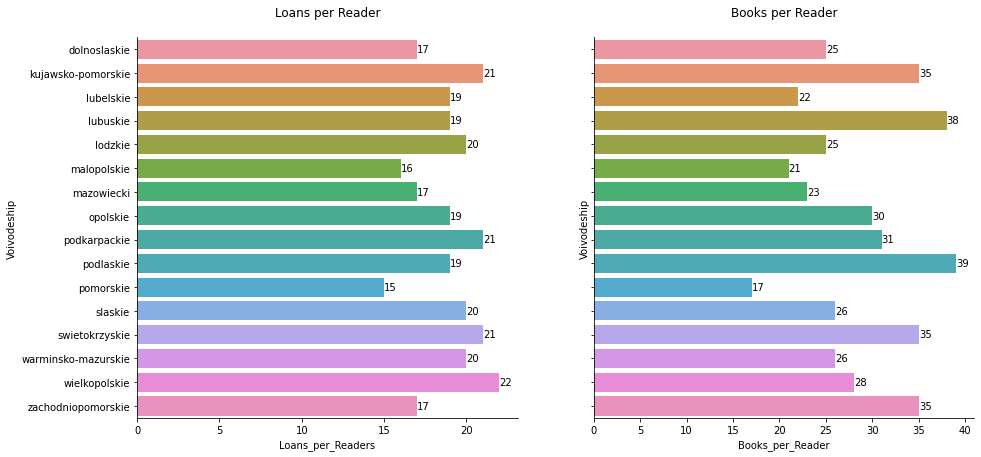

In [49]:
#Number_of_loans per 100 readers and  Amount_of_books per Reader
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 7))

libraries['Books_per_Reader'] = (libraries['Amount_of_books'] / libraries['Number_of_readers']).round(0)

libraries['Loans_per_Readers'] = (libraries['Number_of_loans'] / libraries['Number_of_readers']).round(0)

plt.subplot(1, 2, 1)
ax = sns.barplot(data = libraries, x = 'Loans_per_Readers', y = 'Voivodeship')
plt.title('Loans per Reader\n')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.subplot(1, 2, 2)
ax = sns.barplot(data = libraries, x = 'Books_per_Reader', y = 'Voivodeship')
plt.title('Books per Reader\n')
for i in ax.containers:
    ax.bar_label(i,)
       
sns.despine(top=True)



In [50]:
print(
clr.S+"Top five voivodeships in terms of Amount of Loans per Reader:"+clr.E,
libraries.sort_values('Loans_per_Readers', ascending = False).Voivodeship[:5].str.cat(sep = ', '))
print(
clr.S+"Top five voivodeships in terms of Amount of Books per a Reader:"+clr.E,
libraries.sort_values('Books_per_Reader', ascending = False).Voivodeship[:5].str.cat(sep = ', '))

The first five voivodeships in terms of Amount of Loans per Reader: wielkopolskie, kujawsko-pomorskie, podkarpackie, swietokrzyskie, lodzkie
The first five voivodeships in terms of Amount of Books per a Reader: podlaskie, lubuskie, kujawsko-pomorskie, swietokrzyskie, zachodniopomorskie


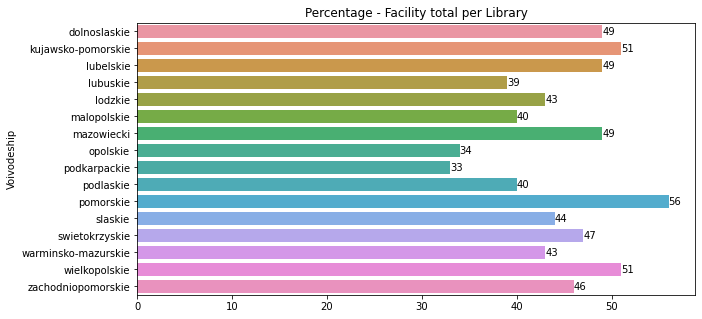

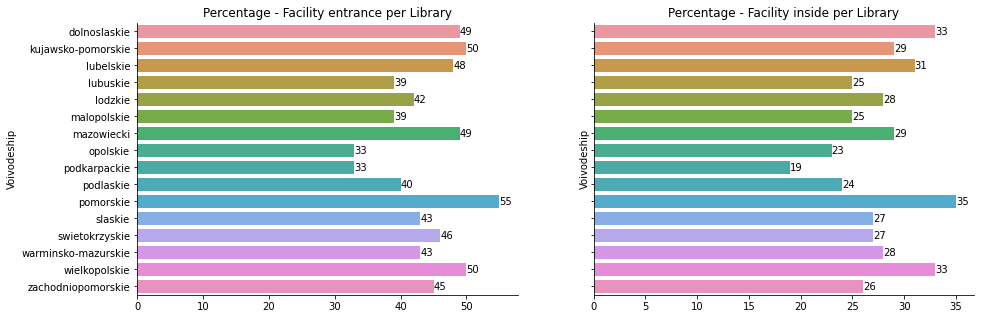

In [51]:
#Какой % библиотек оборудован в общем Facility_adapted_to_the_needs_of_people_with_disabilities per Libraries
#Какой % библиотек оборудован внутри Facility_adapted_to_the_needs_of_people_with_disabilities_(inside_the_building) per Libraries
# Какой % библиотек оборудован на входе
plt.figure(figsize=(10,5))
ax = sns \
        .barplot(data = libraries,
        x =(libraries.Facility_total/libraries.Number_of_libraries*100).round(0), y = 'Voivodeship')
plt.title('Percentage - Facility total per Library')
for i in ax.containers:
    ax.bar_label(i,) 

fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

plt.subplot(1, 2, 1)
ax = sns \
.barplot(data = libraries, 
         x = (libraries.Facility_entrance/libraries.Number_of_libraries*100).round(0), 
         y = 'Voivodeship')
plt.title('Percentage - Facility entrance per Library')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.subplot(1, 2, 2)
ax = sns\
.barplot(data = libraries, x = (libraries.Facility_inside/libraries.Number_of_libraries*100).round(0), y = 'Voivodeship')
plt.title('Percentage - Facility inside per Library')
for i in ax.containers:
    ax.bar_label(i,)    
    
sns.despine(top=True)


# plt.subplot(2,2,1)
# sns.countplot(x =libraries.Facility_total/libraries.Number_of_libraries*100, y = 'Voivodeship')

In [54]:
print(
clr.S+"Top five voivodeships in terms of Facility adapted for people with disabilities:"+clr.E,
libraries.sort_values('Facility_total', ascending = False).Voivodeship[:5].str.cat(sep = ', '))

print(
clr.S+"Top five voivodeships in terms of Facility adapted-entrance-for people with disabilities:"+clr.E,
libraries.sort_values('Facility_entrance', ascending = False).Voivodeship[:5].str.cat(sep = ', '))

print(
clr.S+"Top five voivodeships in terms of Facility adapted-inside-for people with disabilities:"+clr.E,
libraries.sort_values('Facility_inside', ascending = False).Voivodeship[:5].str.cat(sep = ', '))

Top five voivodeships in terms of Facility adapted for people with disabilities: mazowiecki, slaskie, wielkopolskie, dolnoslaskie, malopolskie
Top five voivodeships in terms of Facility adapted-entrance-for people with disabilities: mazowiecki, wielkopolskie, slaskie, dolnoslaskie, malopolskie
Top five voivodeships in terms of Facility adapted-inside-for people with disabilities: mazowiecki, wielkopolskie, slaskie, dolnoslaskie, malopolskie


### Facility adapted to the needs of people with disabilities
We can see that top five voivodeships in each of three categories are mazowiecki, slaskie, wielkopolskie, dolnoslaskie, malopolskie

# Top Five Voivodeships 
To chose top five voivodeships we are going to visualize the following metrics
- Amount of Libraries per 10000 inhabitants
- Amount of Libraries per 1000 readers
- Number of Staff per 100 readers
- Amount of Books per 100 readers
- Percentage Libraries with Facility
- Amount of Books per Library

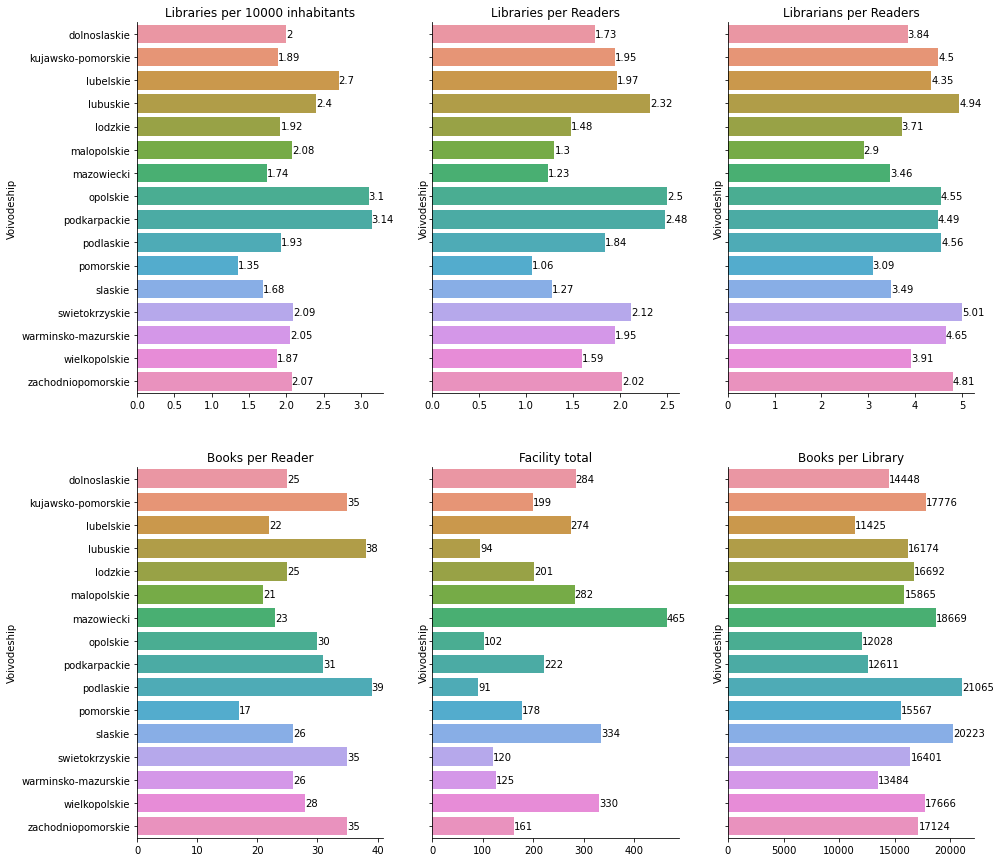

In [67]:
# fig, (ax0, ax1) = 
plt.subplots(2, 3, sharey=True, figsize=(15, 15))

plt.subplot(2, 3, 1)
ax = sns \
.barplot(data = top_libraries, x = (libraries.Number_of_libraries*10000 / population.Total).round(2), y = 'Voivodeship')
ax.set(ylabel='Voivodeship')
plt.title('Libraries per 10000 inhabitants')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.subplot(2, 3, 2)
ax = sns\
.barplot(data = libraries, x = (libraries.Number_of_libraries*1000 / libraries.Number_of_readers).round(2), y = 'Voivodeship')
plt.title('Libraries per Readers')
for i in ax.containers:
    ax.bar_label(i,)    
    
plt.subplot(2, 3, 3)
ax = sns \
.barplot(data = top_libraries, x = (libraries.Number_of_librarians*1000 / libraries.Number_of_readers).round(2), y = 'Voivodeship')
plt.title('Librarians per Readers')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.subplot(2, 3, 4)
ax = sns\
.barplot(data = top_libraries, x = (libraries.Amount_of_books / libraries.Number_of_readers).round(0), y = 'Voivodeship')
plt.title('Books per Reader')
for i in ax.containers:
    ax.bar_label(i,)     
    
plt.subplot(2, 3, 5)
ax = sns \
.barplot(data = top_libraries, x = 'Facility_total', y = 'Voivodeship')
plt.title('Facility total')
ax.set(xlabel='')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.subplot(2, 3, 6)
ax = sns\
.barplot(data = top_libraries, x = 'Books_per_Library', y = 'Voivodeship')
plt.title('Books per Library')
ax.set(xlabel='')
for i in ax.containers:
    ax.bar_label(i,)     
    
    
sns.despine(top=True)


In [91]:
print(
clr.S+"Top five voivodeships: Lubielskie, Śiewtokrzyckie, Zachodnipomorskie"+clr.E,
)

Top five voivodeships: Lubielskie, Śiewtokrzyckie, Zachodnipomorskie


In [ ]:
# libraries.to_csv('libraries_top.csv')